# Project Simulation #

## Importing Libraries ##

In [1]:
import importlib
import TrafficEntities
import random
import numpy as np
import pandas as pd

importlib.reload(TrafficEntities)
from TrafficEntities import Car, Counter, Road, TrafficLight, Junction, sync_traffic_lights
from SimClasses import *
from SimFunctions import *
from SimRNG import *
import matplotlib.pyplot as plt


## Simulation initialize and Parameters ##

In [2]:
# Initialize simulation parameters
green_light_duration = [5,10,15,20]  # Duration of green light in seconds
junction_length = 10  # Length of the junction in meters
seconds_per_14_hours = 50400  # Number of seconds in 14 hours

## horev junction ## 

In [3]:
# Create the roads
Pika_to_Ahuza = Road(length=200, name='Pika_to_Ahuza')
Pika_to_Sason = Road(length=1000000, name='Pika_to_Sason') # the queue doesnt relevant for this direction
Ahuza_to_Pika = Road(length=80, name='Ahuza_to_Pika')
Ahuza_to_Sason = Road(length=80, name='Ahuza_to_Sason')
Sason_to_Pika = Road(length=100, name='Sason_to_Pika')
Sason_to_Ahuza = Road(length=100, name='Sason_to_Ahuza')
Gat_to_Pika = Road(length=500, name='Gat_to_Pika') 
Gat_to_Ahuza = Road(length=500, name='Gat_to_Ahuza')
Gat_to_Sason = Road(length=500, name='Gat_to_Sason')


# Create the counters
counter_Pika_to_Ahuza = Counter()
counter_Pika_to_Sason = Counter()
counter_Ahuza_to_Pika = Counter()
counter_Ahuza_to_Sason = Counter()
counter_Sason_to_Pika = Counter()
counter_Sason_to_Ahuza = Counter()
counter_Gat_to_Pika = Counter()
counter_Gat_to_Ahuza = Counter()
counter_Gat_to_Sason = Counter()

# Create the traffic lights
traffic_light_Pika_to_Ahuza = TrafficLight(green_light_duration[1])
traffic_light_Pika_to_Sason = TrafficLight(green_light_duration[1]) # this direction does not have traffic light
traffic_light_Ahuza_to_Pika = TrafficLight(green_light_duration[1])
traffic_light_Ahuza_to_Sason = TrafficLight(green_light_duration[1])
traffic_light_Sason_to_Pika = TrafficLight(green_light_duration[1])
traffic_light_Sason_to_Ahuza = TrafficLight(green_light_duration[1])
traffic_light_Gat_to_Pika = TrafficLight(green_light_duration[1])
traffic_light_Gat_to_Ahuza = TrafficLight(green_light_duration[1])
traffic_light_Gat_to_Sason = TrafficLight(green_light_duration[1])

# Create the junction
junction = Junction(id="Horev", junction_length=junction_length, green_light_duration=green_light_duration[1])

# road counter connection
junction.add_road(Pika_to_Ahuza, counter_Pika_to_Ahuza)
junction.add_road(Pika_to_Sason, counter_Pika_to_Sason)
junction.add_road(Ahuza_to_Pika, counter_Ahuza_to_Pika)
junction.add_road(Ahuza_to_Sason, counter_Ahuza_to_Sason)
junction.add_road(Sason_to_Pika, counter_Sason_to_Pika)
junction.add_road(Sason_to_Ahuza, counter_Sason_to_Ahuza)
junction.add_road(Gat_to_Pika, counter_Gat_to_Pika)
junction.add_road(Gat_to_Ahuza, counter_Gat_to_Ahuza)
junction.add_road(Gat_to_Sason, counter_Gat_to_Sason)

# road traffic light connection
junction.add_traffic_light(traffic_light_Ahuza_to_Pika)
junction.add_traffic_light(traffic_light_Ahuza_to_Sason)
junction.add_traffic_light(traffic_light_Pika_to_Ahuza)
junction.add_traffic_light(traffic_light_Pika_to_Sason) # this direction does not have traffic light
junction.add_traffic_light(traffic_light_Sason_to_Ahuza)
junction.add_traffic_light(traffic_light_Sason_to_Pika)
junction.add_traffic_light(traffic_light_Gat_to_Pika)
junction.add_traffic_light(traffic_light_Gat_to_Ahuza)
junction.add_traffic_light(traffic_light_Gat_to_Sason)

## traffic light sync and logic ##  

In [4]:
# Define your traffic light groups
Pika = [traffic_light_Pika_to_Ahuza]
Ahuza = [traffic_light_Ahuza_to_Pika, traffic_light_Ahuza_to_Sason]
Sasson = [traffic_light_Sason_to_Pika, traffic_light_Sason_to_Ahuza]
Gat = [traffic_light_Gat_to_Pika, traffic_light_Gat_to_Ahuza, traffic_light_Gat_to_Sason]

group_1 = [traffic_light_Ahuza_to_Pika, traffic_light_Ahuza_to_Sason, traffic_light_Sason_to_Ahuza]
group_2 = [traffic_light_Pika_to_Ahuza, traffic_light_Ahuza_to_Pika, traffic_light_Gat_to_Sason]


# Create the toggle function
toggle_lights_1 = sync_traffic_lights(Ahuza, Gat, Sasson, Pika)
toggle_lights_2 = sync_traffic_lights(group_1,group_2,Sasson,group_1,group_2,Gat)
toggle_lights_3 = sync_traffic_lights(Gat, group_1, Sasson, group_2, group_1)

# Call the toggle function in your simulation loop
#toggle_lights()  # Toggles the traffic lights to the next group

## simulation loop ##

In [5]:
# Run the simulation loop
count = 0
current_time = 0  # Start the simulation clock

# link traffic light to road to counter to poisson rate
Traffic_Road_List = [[traffic_light_Ahuza_to_Sason,Ahuza_to_Sason, (9918/seconds_per_14_hours), counter_Ahuza_to_Sason],
                     [traffic_light_Ahuza_to_Pika,Ahuza_to_Pika, (12621/seconds_per_14_hours), counter_Ahuza_to_Pika],
                     [traffic_light_Pika_to_Ahuza,Pika_to_Ahuza, (10753/seconds_per_14_hours), counter_Pika_to_Ahuza],
                     [traffic_light_Pika_to_Sason,Pika_to_Sason, (5876/seconds_per_14_hours), counter_Pika_to_Sason],
                     [traffic_light_Sason_to_Ahuza,Sason_to_Ahuza, (10673/seconds_per_14_hours), counter_Sason_to_Ahuza],
                     [traffic_light_Sason_to_Pika,Sason_to_Pika, (3988/seconds_per_14_hours), counter_Sason_to_Pika],
                     [traffic_light_Gat_to_Pika,Gat_to_Pika, (2548/seconds_per_14_hours), counter_Gat_to_Pika],
                     [traffic_light_Gat_to_Ahuza,Gat_to_Ahuza, (2065/seconds_per_14_hours), counter_Gat_to_Ahuza],
                     [traffic_light_Gat_to_Sason,Gat_to_Sason, (1187/seconds_per_14_hours), counter_Gat_to_Sason]]

## simulation function ##

In [6]:
def run_simulation(simulation_time, green_light_duration, traffic_road_list, toggle_lights_func):
    """
    Runs a single simulation of traffic lights and vehicle movement.

    Args:
        simulation_time (int): Total time to run the simulation (e.g., 50400 seconds).
        green_light_duration (list): List of durations for green lights in each group.
        traffic_road_list (list): List of traffic lights, roads, and Poisson rates.
        toggle_lights_func (function): Function to toggle traffic lights between groups.

    Returns:
        dict: A dictionary of results (e.g., counters, queue sizes, etc.).
    """
    # Initialize variables
    current_time = 0
    count = 0
    time_in_system = {}  # Time spent in the system for each car
    
    # Metrics to save
    simulation_data = pd.DataFrame(columns=['iteration', 'time', 'Pika_to_Ahuza_counter', 'Pika_to_Sason_counter', 'Ahuza_to_Pika_counter', 'Ahuza_to_Sason_counter', 'Sason_to_Pika_counter', 'Sason_to_Ahuza_counter', 'Gat_to_Pika_counter', 'Gat_to_Ahuza_counter', 'Gat_to_Sason_counter', 'Pika_to_Ahuza_state', 'Pika_to_Sason_state', 'Ahuza_to_Pika_state', 'Ahuza_to_Sason_state', 'Sason_to_Pika_state', 'Sason_to_Ahuza_state', 'Gat_to_Pika_state', 'Gat_to_Ahuza_state', 'Gat_to_Sason_state', 'Pika_to_Ahuza_queue', 'Pika_to_Sason_queue', 'Ahuza_to_Pika_queue', 'Ahuza_to_Sason_queue', 'Sason_to_Pika_queue', 'Sason_to_Ahuza_queue', 'Gat_to_Pika_queue', 'Gat_to_Ahuza_queue', 'Gat_to_Sason_queue', 'Pika_to_Ahuza_time', 'Pika_to_Sason_time', 'Ahuza_to_Pika_time', 'Ahuza_to_Sason_time', 'Sason_to_Pika_time', 'Sason_to_Ahuza_time', 'Gat_to_Pika_time', 'Gat_to_Ahuza_time', 'Gat_to_Sason_time'])
    
    # Reset all counters
    for _, _, _, counter in traffic_road_list:
        counter.reset()
        
    # Reset all roads
    for _, road, _, _ in traffic_road_list:
        road.reset_road()

    # Simulation loop
    while current_time < simulation_time:
        # Step 1: Toggle traffic lights
        count += 1
        toggle_lights_func()
        
        row_data = {'iteration': count, 'time': current_time}
        
        # Step 2: Process queues for green lights
        for traffic, road, _, _ in traffic_road_list:
            if traffic.is_green():
                time_in_system[road.name] = junction.process_queue(road,current_time)
                row_data[f'{road.name}_time'] = time_in_system[road.name]
                # Step 3: Add the time in the system to row_data
               # for road_name, time in time_in_system.items():

        # Step 3: Generate cars for red lights
        for traffic, road, rate, _ in traffic_road_list:
            if not traffic.is_green():
                junction.generate_cars_poisson(road, rate=rate * green_light_duration, current_time=current_time)
                row_data[f'{road.name}_time'] = 0
                
        # Temporary list to store rows
        temp_rows = []
        
        
        
        for traffic, road, _, counter in traffic_road_list:
            # Use road.name instead of the object representation
            row_data[f'{road.name}_counter'] = counter.get_counter()
            row_data[f'{road.name}_queue'] = len(road.queue)
            row_data[f'{road.name}_state'] = 1 if traffic.is_green() else 0

        
        # Save metrics at the current time step
        temp_rows.append(row_data)
        
        # Add the rows to the DataFrame
        if temp_rows:  # Ensure temp_rows is not empty
            temp_df = pd.DataFrame(temp_rows)
            # Drop all-NA rows or columns if necessary
            temp_df = temp_df.dropna(how='all', axis=1)  # Drop columns that are all-NA
            simulation_data = pd.concat([simulation_data, pd.DataFrame(temp_df)], ignore_index=True)

        # Step 4: Advance the simulation clock
        current_time += green_light_duration

    # Return collected metrics
    return simulation_data  

In [7]:
def data_processing(sim_1):
    # Calculate the total number of cars in the system for each road
    total_cars = {
        'Pika_to_Ahuza': sim_1['Pika_to_Ahuza_counter'].iloc[-1] + sim_1['Pika_to_Ahuza_queue'].iloc[-1],
        'Pika_to_Sason': sim_1['Pika_to_Sason_counter'].iloc[-1] + sim_1['Pika_to_Sason_queue'].iloc[-1],
        'Ahuza_to_Pika': sim_1['Ahuza_to_Pika_counter'].iloc[-1] + sim_1['Ahuza_to_Pika_queue'].iloc[-1],
        'Ahuza_to_Sason': sim_1['Ahuza_to_Sason_counter'].iloc[-1] + sim_1['Ahuza_to_Sason_queue'].iloc[-1],
        'Sason_to_Pika': sim_1['Sason_to_Pika_counter'].iloc[-1] + sim_1['Sason_to_Pika_queue'].iloc[-1],
        'Sason_to_Ahuza': sim_1['Sason_to_Ahuza_counter'].iloc[-1] + sim_1['Sason_to_Ahuza_queue'].iloc[-1],
        'Gat_to_Pika': sim_1['Gat_to_Pika_counter'].iloc[-1] + sim_1['Gat_to_Pika_queue'].iloc[-1],
        'Gat_to_Ahuza': sim_1['Gat_to_Ahuza_counter'].iloc[-1] + sim_1['Gat_to_Ahuza_queue'].iloc[-1],
        'Gat_to_Sason': sim_1['Gat_to_Sason_counter'].iloc[-1] + sim_1['Gat_to_Sason_queue'].iloc[-1]
    }

    total_cars['Total'] = sum(total_cars.values())

    # Calculate the total time spent in the system for each road
    total_time = {
        'Pika_to_Ahuza': sim_1['Pika_to_Ahuza_time'].sum(),
        'Pika_to_Sason': sim_1['Pika_to_Sason_time'].sum(),
        'Ahuza_to_Pika': sim_1['Ahuza_to_Pika_time'].sum(),
        'Ahuza_to_Sason': sim_1['Ahuza_to_Sason_time'].sum(),
        'Sason_to_Pika': sim_1['Sason_to_Pika_time'].sum(),
        'Sason_to_Ahuza': sim_1['Sason_to_Ahuza_time'].sum(),
        'Gat_to_Pika': sim_1['Gat_to_Pika_time'].sum(),
        'Gat_to_Ahuza': sim_1['Gat_to_Ahuza_time'].sum(),
        'Gat_to_Sason': sim_1['Gat_to_Sason_time'].sum()
    }

    total_time['Total'] = sum(total_time.values())

    # Calculate the average time spent in the system for each road
    average_time = {
        road: total_time[road] / total_cars[road] if total_cars[road] > 0 else 0
        for road in total_cars
    }

    # Calculate queue length for each road
    queue_length = {
        'Pika_to_Ahuza': sim_1['Pika_to_Ahuza_queue'].iloc[-1],
        'Pika_to_Sason': sim_1['Pika_to_Sason_queue'].iloc[-1],
        'Ahuza_to_Pika': sim_1['Ahuza_to_Pika_queue'].iloc[-1],
        'Ahuza_to_Sason': sim_1['Ahuza_to_Sason_queue'].iloc[-1],
        'Sason_to_Pika': sim_1['Sason_to_Pika_queue'].iloc[-1],
        'Sason_to_Ahuza': sim_1['Sason_to_Ahuza_queue'].iloc[-1],
        'Gat_to_Pika': sim_1['Gat_to_Pika_queue'].iloc[-1],
        'Gat_to_Ahuza': sim_1['Gat_to_Ahuza_queue'].iloc[-1],
        'Gat_to_Sason': sim_1['Gat_to_Sason_queue'].iloc[-1]
    }

    queue_length['Total'] = sum(queue_length.values())

    # Create a DataFrame to organize the data
    data = {
        'Pika_to_Ahuza': [
            total_cars['Pika_to_Ahuza'], total_time['Pika_to_Ahuza'], average_time['Pika_to_Ahuza'], queue_length['Pika_to_Ahuza']
        ],
        'Pika_to_Sason': [
            total_cars['Pika_to_Sason'], total_time['Pika_to_Sason'], average_time['Pika_to_Sason'], queue_length['Pika_to_Sason']
        ],
        'Ahuza_to_Pika': [
            total_cars['Ahuza_to_Pika'], total_time['Ahuza_to_Pika'], average_time['Ahuza_to_Pika'], queue_length['Ahuza_to_Pika']
        ],
        'Ahuza_to_Sason': [
            total_cars['Ahuza_to_Sason'], total_time['Ahuza_to_Sason'], average_time['Ahuza_to_Sason'], queue_length['Ahuza_to_Sason']
        ],
        'Sason_to_Pika': [
            total_cars['Sason_to_Pika'], total_time['Sason_to_Pika'], average_time['Sason_to_Pika'], queue_length['Sason_to_Pika']
        ],
        'Sason_to_Ahuza': [
            total_cars['Sason_to_Ahuza'], total_time['Sason_to_Ahuza'], average_time['Sason_to_Ahuza'], queue_length['Sason_to_Ahuza']
        ],
        'Gat_to_Pika': [
            total_cars['Gat_to_Pika'], total_time['Gat_to_Pika'], average_time['Gat_to_Pika'], queue_length['Gat_to_Pika']
        ],
        'Gat_to_Ahuza': [
            total_cars['Gat_to_Ahuza'], total_time['Gat_to_Ahuza'], average_time['Gat_to_Ahuza'], queue_length['Gat_to_Ahuza']
        ],
        'Gat_to_Sason': [
            total_cars['Gat_to_Sason'], total_time['Gat_to_Sason'], average_time['Gat_to_Sason'], queue_length['Gat_to_Sason']
        ],
        'Total': [
            total_cars['Total'], total_time['Total'], average_time['Total'], queue_length['Total']
        ]
    }

    df = pd.DataFrame(data, index=['Cars in System', 'Total Time', 'Average Time', 'Queue Length'])
    return df

In [8]:
def bar_plot_data(processed_df, num, dur):
    # Extract the rows for plotting
    cars_in_system = processed_df.loc['Cars in System']
    average_time = processed_df.loc['Average Time']
    queue_length = processed_df.loc['Queue Length']
    
    # Create bar plot for "Cars in System"
    plt.figure(figsize=(10, 6))
    cars_in_system.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Total Cars in System per Road in simulation {num} with {dur} sec green duration ', fontsize=14)
    plt.ylabel('Number of Cars', fontsize=12)
    plt.xlabel('Roads', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Create bar plot for "Average Time"
    plt.figure(figsize=(10, 6))
    average_time.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Average Time in System per Road in simulation {num} with {dur} sec green duration ', fontsize=14)
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.xlabel('Roads', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Create bar plot for "Queue Length"
    plt.figure(figsize=(10, 6))
    queue_length.plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f'Queue Length per Road in simulation {num} with {dur} sec green duration ', fontsize=14)
    plt.ylabel('Number of Cars in Queue', fontsize=12)
    plt.xlabel('Roads', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [9]:
def time_plots(sim_1):
    """
    Generate plots for queue size and time in the system for each group of roads.

    Args:
        sim_1 (pd.DataFrame): Simulation results DataFrame containing queue size and time columns.
    """
    # Group columns by their prefixes
    grouped_columns = {
        'Pika': [col for col in sim_1.columns if col.startswith('Pika')],
        'Ahuza': [col for col in sim_1.columns if col.startswith('Ahuza')],
        'Sason': [col for col in sim_1.columns if col.startswith('Sason')],
        'Gat': [col for col in sim_1.columns if col.startswith('Gat')]
    }

    # Generate plots for each group
    for group, columns in grouped_columns.items():
        # Separate queue and time columns for the current group
        queue_cols = [col for col in columns if 'queue' in col]
        time_cols = [col for col in columns if 'time' in col]

        # Plot queue size for the current group
        plt.figure(figsize=(10, 5))
        for col in queue_cols:
            plt.plot(sim_1['time'], sim_1[col], label=col)
        plt.title(f"Queue Size Over Time - {group}")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Queue Size")
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

        # Plot time in system for the current group
        plt.figure(figsize=(10, 5))
        for col in time_cols:
            plt.plot(sim_1['time'], sim_1[col], label=col)
        plt.title(f"Time in System Over Time - {group}")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Time in System (seconds)")
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

## One simulation run  ##
### plot over time ### 

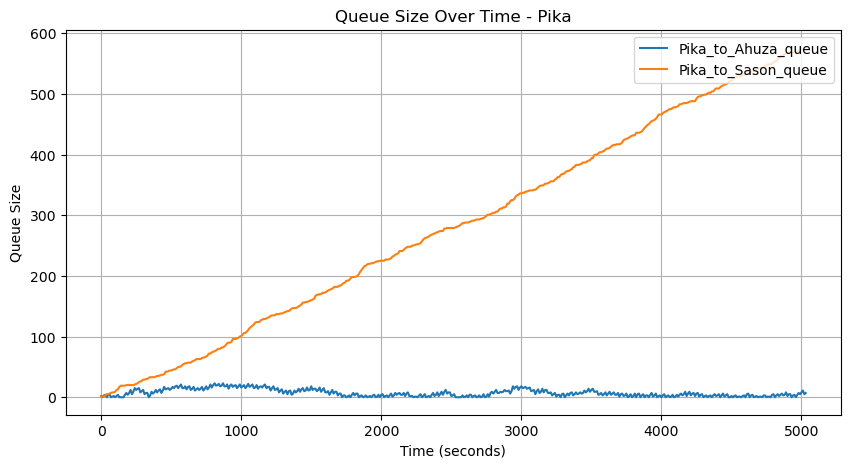

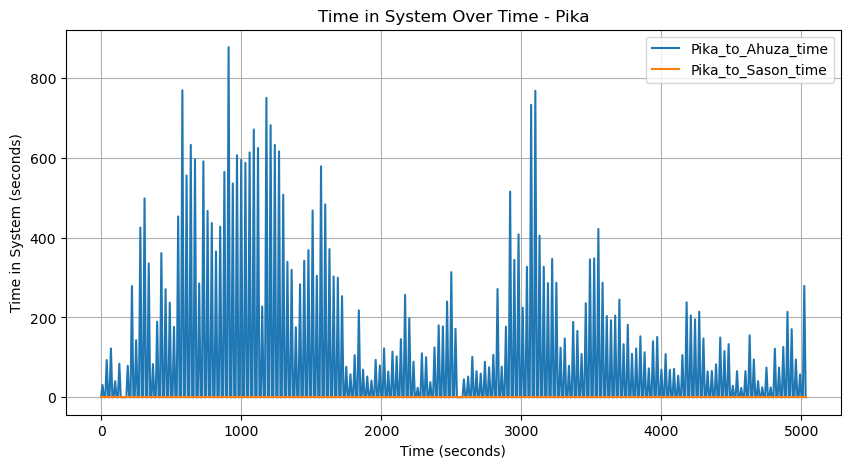

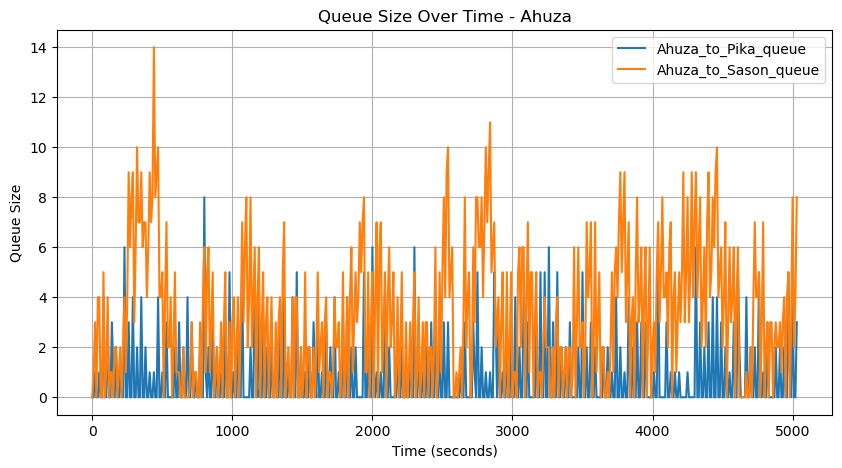

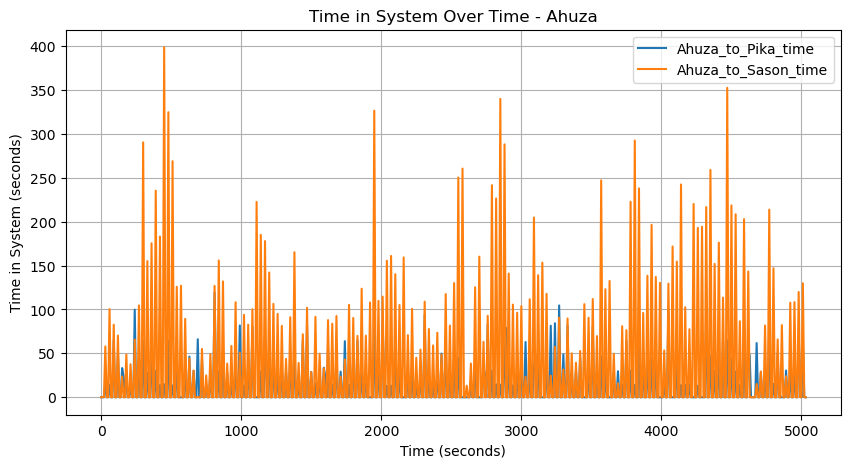

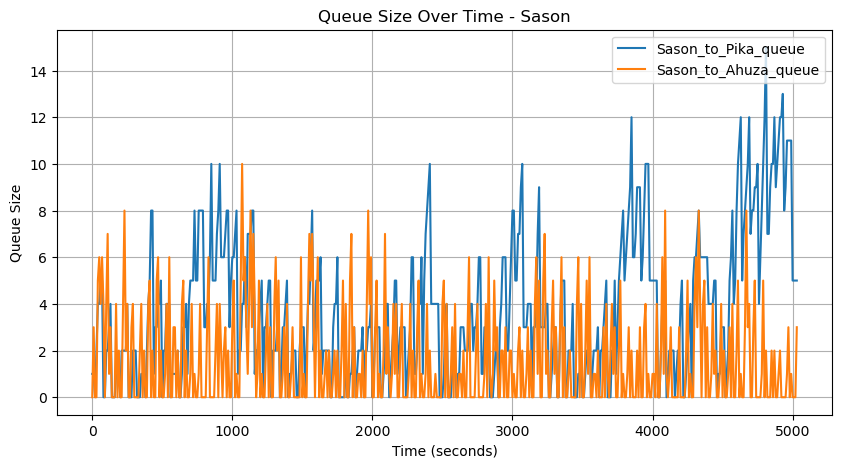

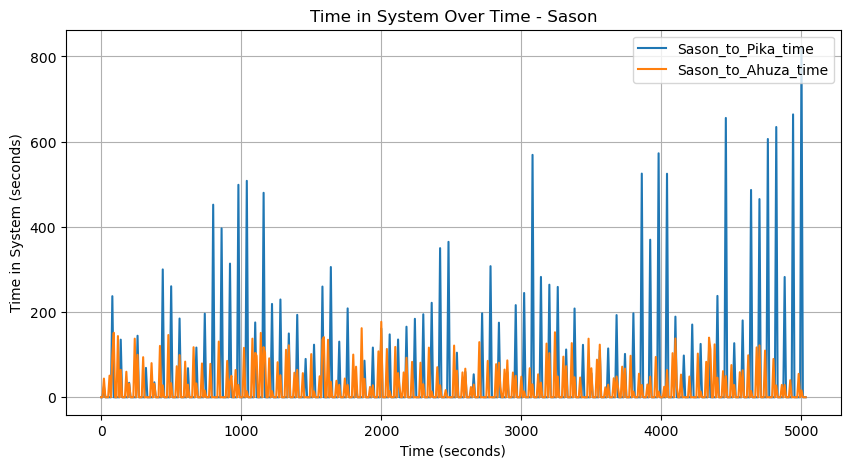

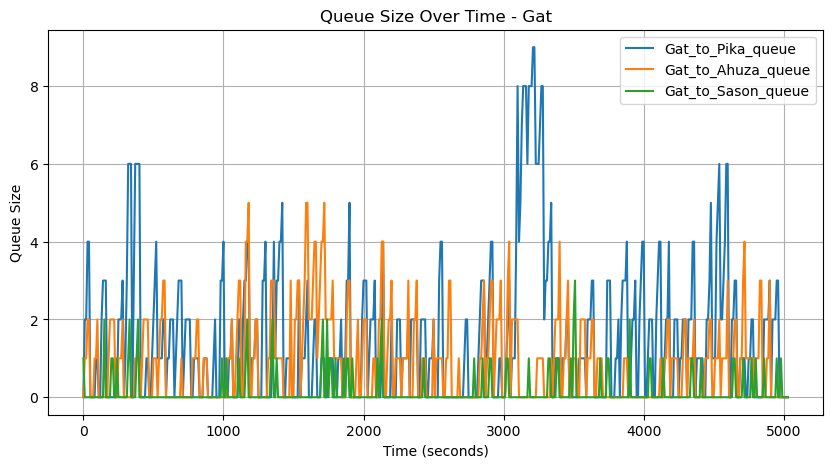

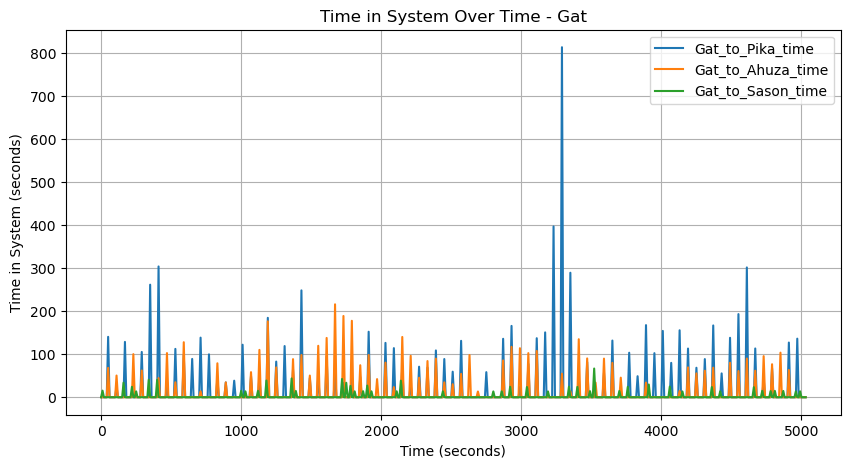

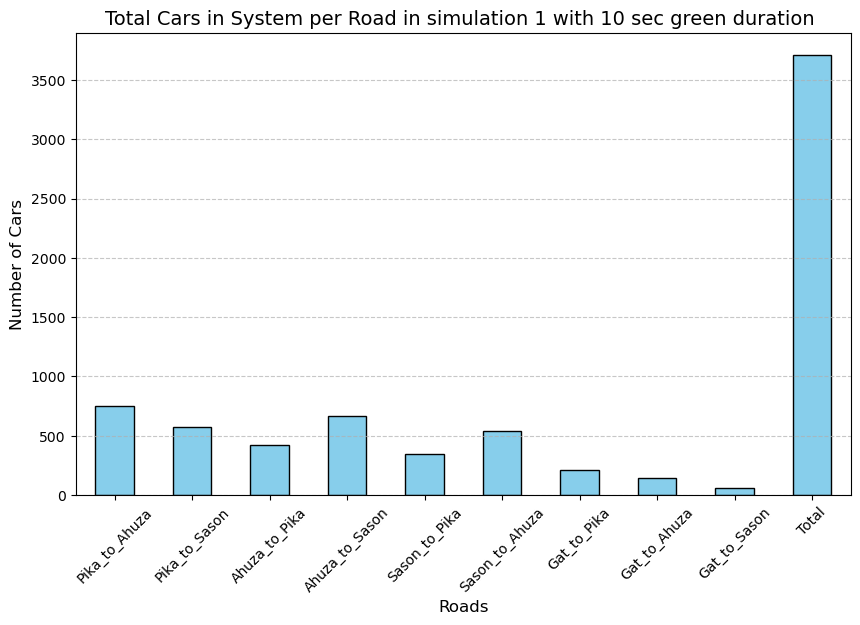

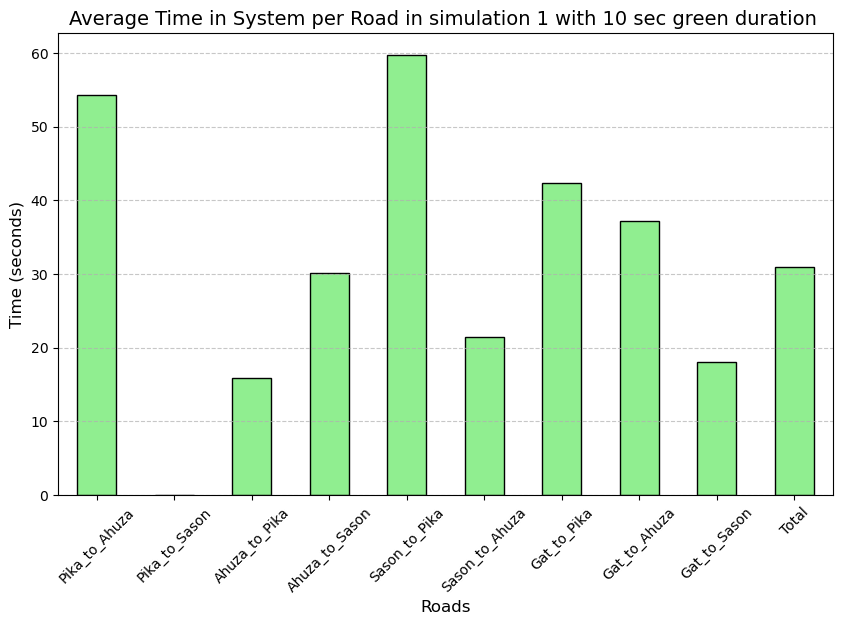

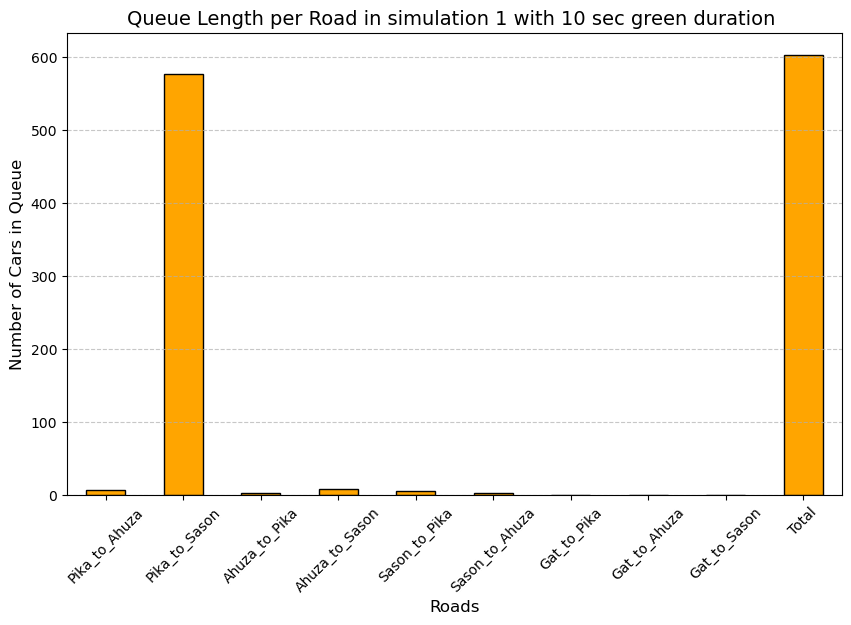

In [11]:
# Run the simulation
sim_1 = run_simulation(simulation_time=5040, green_light_duration=green_light_duration[1], traffic_road_list=Traffic_Road_List, toggle_lights_func=toggle_lights_2)
time_plots(sim_1)
bar_plot_data(data_processing(sim_1), 1, green_light_duration[1])

## multiple simulation run ##
### run multiple simulation with different green light duration ###


In [12]:
def run_multiple_simulations(green_light_durations, runs_per_duration, simulation_time, traffic_road_list, toggle_lights_func):
    """
    Runs the simulation multiple times for different green light durations while keeping the simulation time constant.

    Args:
        green_light_durations (list): List of different green light durations to test (e.g., [5, 10, 15, 20]).
        runs_per_duration (int): Number of times each simulation should be run for statistical significance.
        simulation_time (int): Fixed total simulation time for all runs.
        traffic_road_list (list): List of traffic lights, roads, and Poisson rates.
        toggle_lights_func (function): Function to toggle traffic lights between groups.

    Returns:
        dict: A dictionary with green light durations as keys and lists of processed DataFrames as values.
    """
    results = {}

    for green_duration in green_light_durations:
        processed_dfs = []

        for _ in range(runs_per_duration):
            # Run the simulation with a fixed simulation time but different green light durations
            sim_results = run_simulation(simulation_time, green_duration, traffic_road_list, toggle_lights_func)
            
            # Process the simulation results
            processed_df = data_processing(sim_results)
            processed_dfs.append(processed_df)

        results[green_duration] = processed_dfs

    return results

def aggregate_statistics(simulation_results):
    """
    Aggregates statistics (mean, std, min, max) from multiple simulation runs.

    Args:
        simulation_results (dict): Dictionary with green light durations as keys and lists of processed DataFrames as values.

    Returns:
        dict: A dictionary containing aggregated statistics for each green light duration.
    """
    aggregated_results = {}

    for green_duration, df_list in simulation_results.items():
        all_runs = pd.concat(df_list, keys=range(len(df_list)), names=['Run', 'Metric'])

        # Compute statistics
        mean_df = all_runs.groupby(level='Metric').mean()
        std_df = all_runs.groupby(level='Metric').std()
        min_df = all_runs.groupby(level='Metric').min()
        max_df = all_runs.groupby(level='Metric').max()

        # Combine statistics into a single DataFrame
        aggregated_stats = pd.concat({'Mean': mean_df, 'Std': std_df, 'Min': min_df, 'Max': max_df}, axis=1)
        aggregated_results[green_duration] = aggregated_stats

    return aggregated_results

def bar_plot_statistics_split(aggregated_results):
    """
    Plots separate bar charts for selected metrics (Cars in System, Average Time, Queue Length) 
    while splitting them by different green light durations.

    Args:
        aggregated_results (dict): Dictionary containing aggregated statistics for each green light duration.
    """
    selected_metrics = ['Cars in System', 'Average Time', 'Queue Length']  # Selecting 1st, 3rd, and 4th rows

    for metric in selected_metrics:
        fig, axes = plt.subplots(1, len(aggregated_results), figsize=(16, 6), sharey=True)  

        for idx, (green_duration, stats_df) in enumerate(aggregated_results.items()):
            mean_values = stats_df['Mean'].loc[metric]
            std_values = stats_df['Std'].loc[metric]

            ax = axes[idx]
            mean_values.plot(kind='bar', yerr=std_values, capsize=4, alpha=0.7, ax=ax, color='royalblue', edgecolor='black')
            ax.set_title(f"Green Light Duration {green_duration}s")
            ax.set_xlabel("Roads")
            ax.set_xticklabels(mean_values.index, rotation=45)
            ax.grid(axis='y', linestyle='--', alpha=0.7)

        fig.suptitle(f"Mean and Standard Deviation for {metric}", fontsize=14)
        plt.tight_layout()
        plt.show()

## first traffic light logic ## 

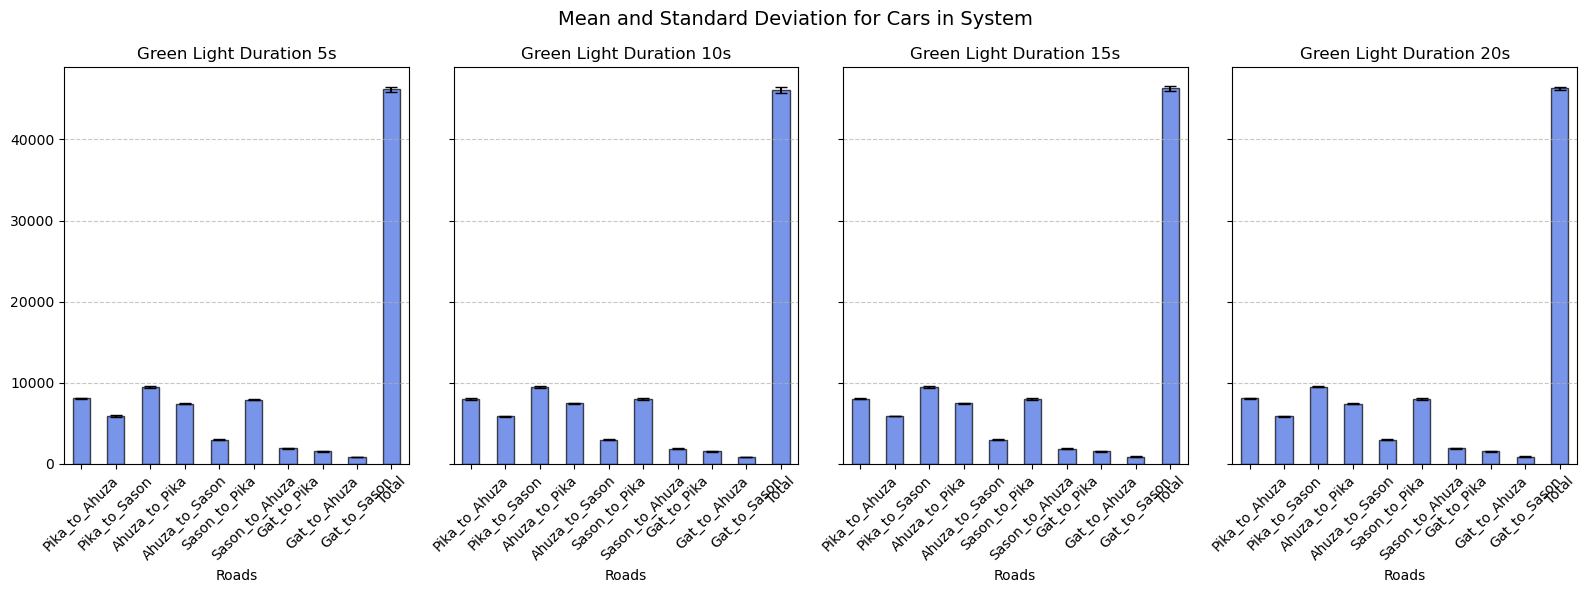

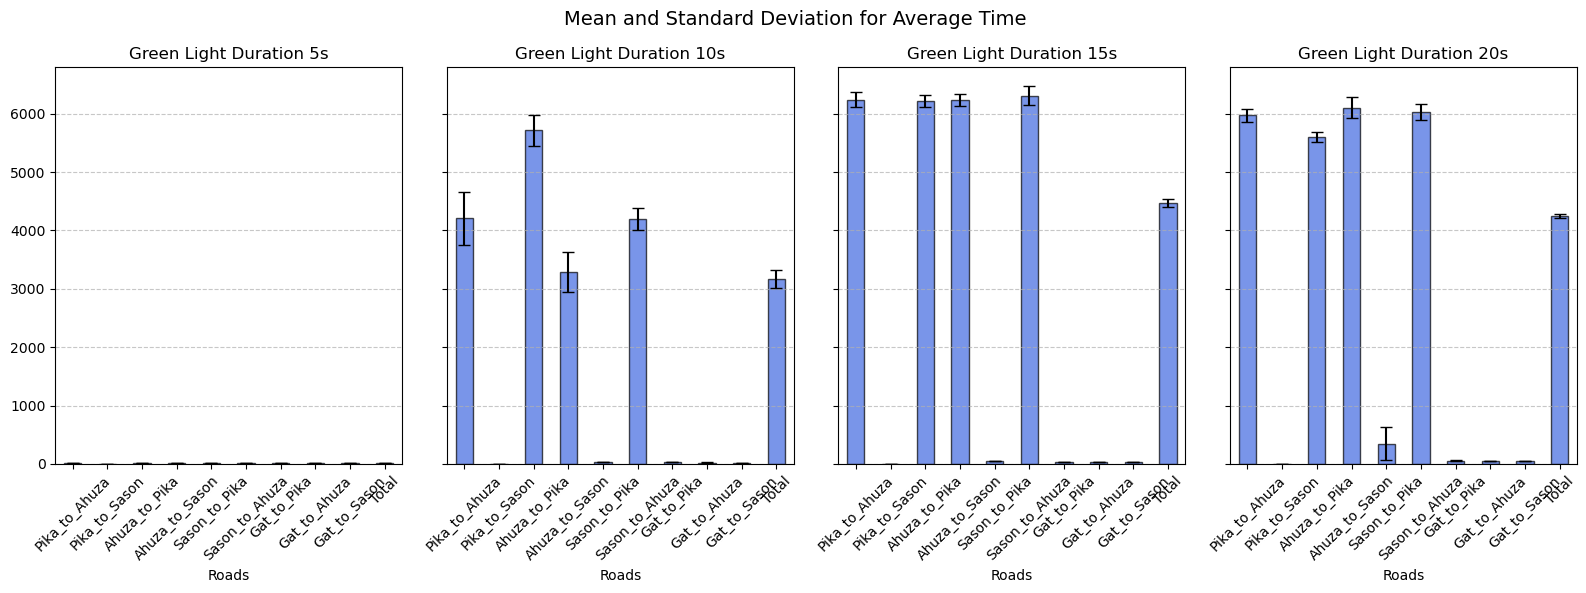

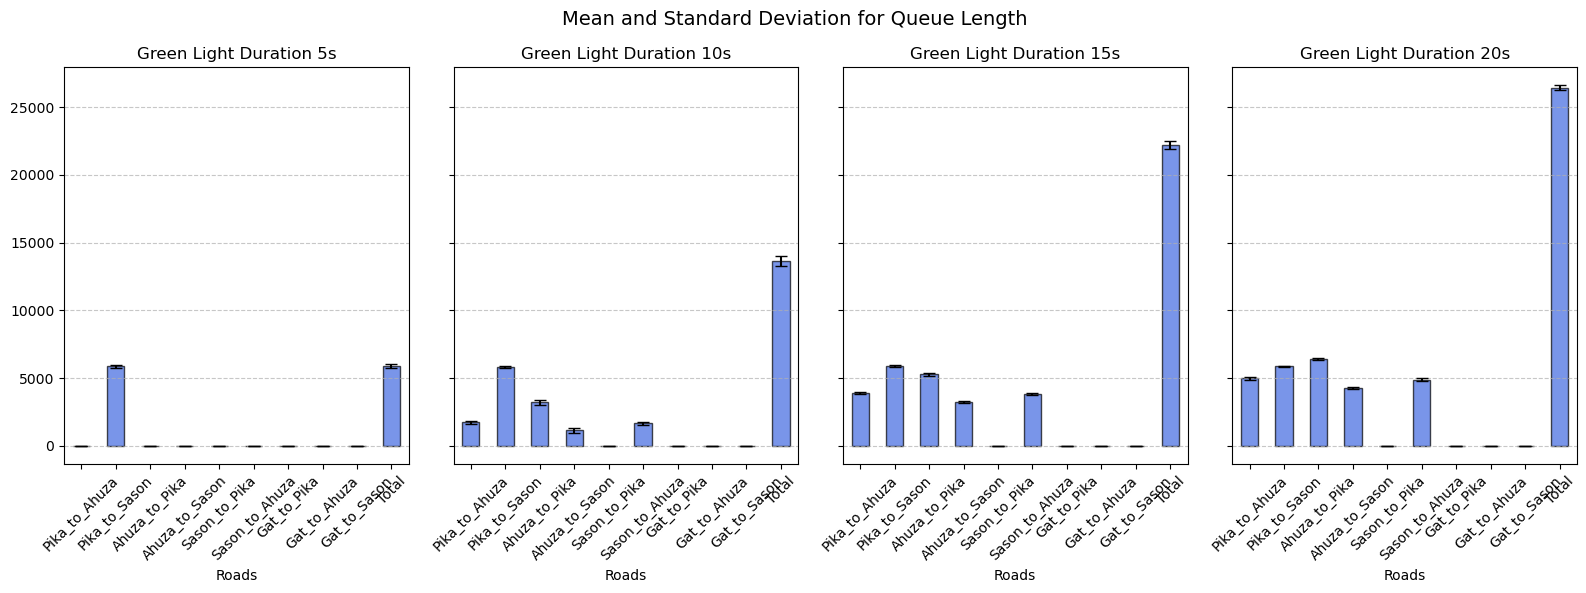

In [17]:
# Usage Example
green_light_durations = [5, 10, 15, 20]  # Different green light durations to test
runs_per_duration = 5  # Number of runs per duration
simulation_time = 50400  # Fixed simulation time
traffic_road_list = Traffic_Road_List  # Ensure this is defined
toggle_lights_func = toggle_lights_1  # Ensure this is defined

# Run multiple simulations
simulation_results_1 = run_multiple_simulations(green_light_durations, runs_per_duration, simulation_time, traffic_road_list, toggle_lights_func)

# Aggregate statistics
aggregated_results_1 = aggregate_statistics(simulation_results_1)

# Plot results
bar_plot_statistics_split(aggregated_results_1)

## second traffic light logic ##

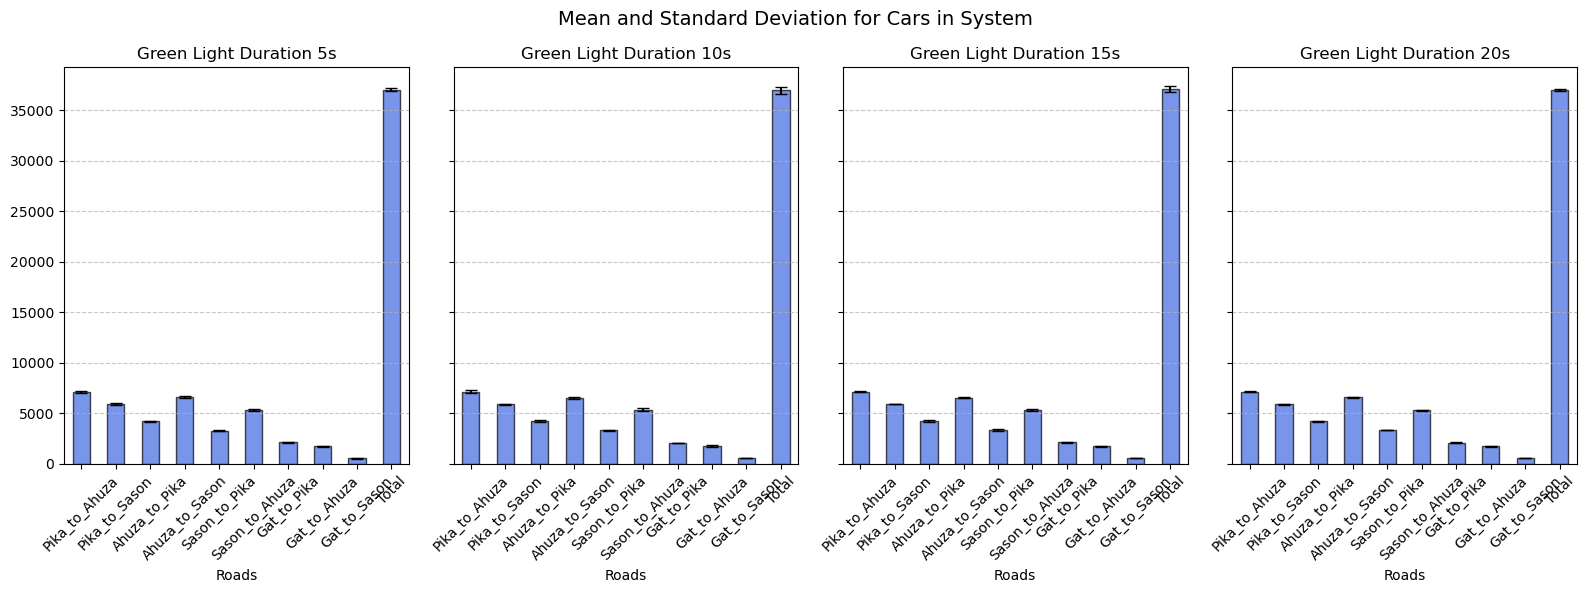

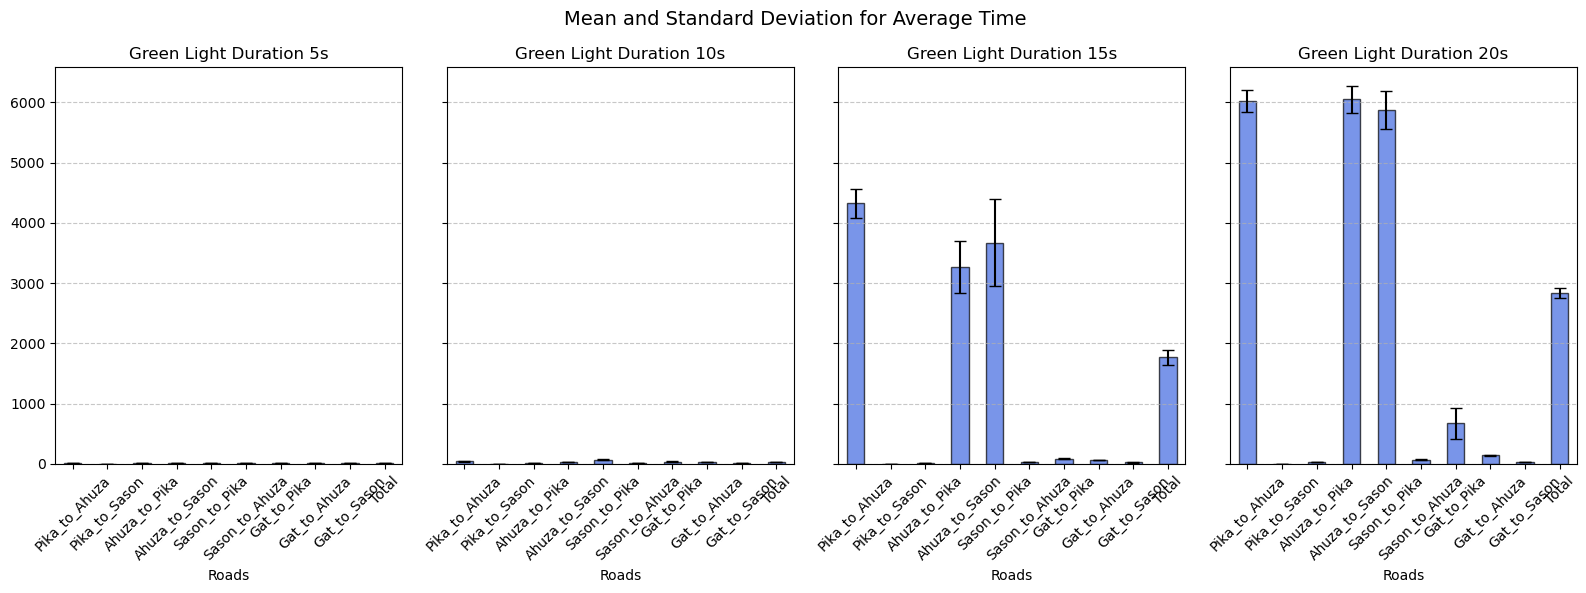

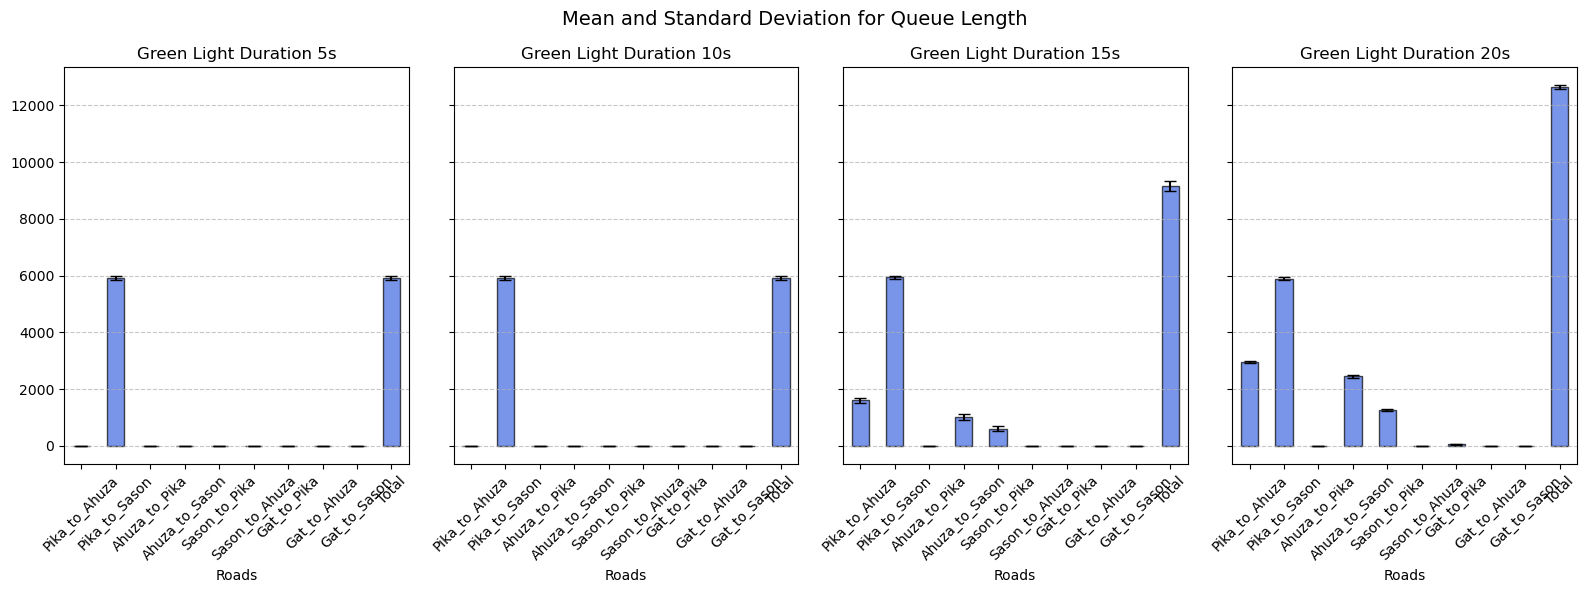

In [21]:
# Run multiple simulations
simulation_results_2 = run_multiple_simulations(green_light_durations, runs_per_duration, simulation_time, traffic_road_list, toggle_lights_2)

# Aggregate statistics
aggregated_results_2 = aggregate_statistics(simulation_results_2)

# Plot results
bar_plot_statistics_split(aggregated_results_2)

# third traffic light logic # 

In [ ]:
# Run multiple simulations
simulation_results_3 = run_multiple_simulations(green_light_durations, runs_per_duration, simulation_time, traffic_road_list, toggle_lights_3)

# Aggregate statistics
aggregated_results_3 = aggregate_statistics(simulation_results_3)

# Plot results
bar_plot_statistics_split(aggregated_results_3)

# Thank you for reading the project simulation. #